In [18]:
# %% Patch the PYTHONPATH to run scripts native to parent-level folder
import sys
import os
PACKAGE_PARENT = '..'
sys.path.append(os.path.normpath(os.path.expanduser("~/tallem")))

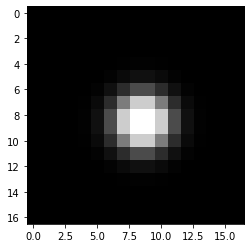

In [46]:
import matplotlib.pyplot as plt 
import numpy as np

def gaussian(x, mu, sig):
	return 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)

I = np.zeros(shape=(17,17))

# 

mu = [8, 8]
Sigma = np.diag([2,2])
locations = np.array([[0,0], [0,1], [1,0], [1,1]])


def mvn_density(locations, mu, Sigma):
	d, k, S_inv, mu = np.linalg.det(Sigma), len(mu), np.linalg.inv(Sigma), np.asanyarray(mu)[:,np.newaxis]
	result = np.zeros(locations.shape[0])
	for i, x in enumerate(locations): 
		x = x.reshape(mu.shape)
		f_x = np.exp(-0.5*((x - mu).T @ S_inv @ (x - mu)))/np.sqrt((2*np.pi)**k * d)
		result[i] = f_x
	return(result)
	
def gaussian_pixel(center, Sigma, d=17,s=1):
	from src.tallem.utility import cartesian_product
	grid_ind = cartesian_product([range(d), range(d)])
	grid = np.zeros(shape=(d,d))	
	F = mvn_density(grid_ind, center, Sigma)
	for i, ind in enumerate(grid_ind):
		r,c = ind
		grid[r,c] = s*F[i]
	return(grid)

plt.imshow(gaussian_pixel([8.5, 8.5], Sigma, s=1), cmap='gray', vmin=0, vmax=np.max(F))

0.13919988234736302 16.93878086680917 -0.380358091762389 16.3276377650231


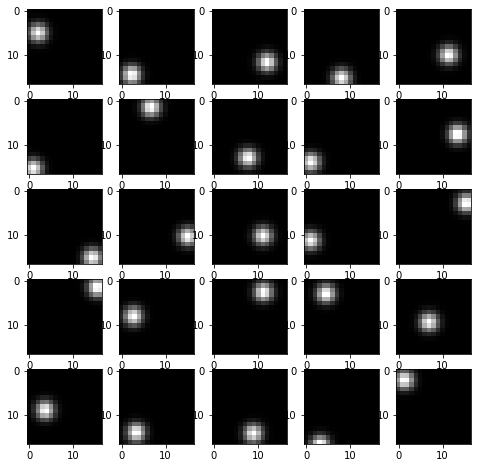

In [76]:
phi = np.random.uniform(low=0, high=2*np.pi, size=100)
theta = np.random.uniform(low=-np.pi/2, high=np.pi/2, size=100)

X, Y = (phi/(2*np.pi))*17, ((theta/np.pi)*17) + 8

print(np.min(X), np.max(X), np.min(Y), np.max(Y))

P = [gaussian_pixel([x, y], Sigma, s=1) for x,y in np.c_[X,Y]]

#print((phi/(2*np.pi)))
# plt.imshow(P[1], cmap='gray', vmin=0, vmax=np.max(P[i]))

fig = plt.figure(figsize=(8, 8))
for i, p in enumerate(P[0:25]):
	fig.add_subplot(5, 5, i+1)
	plt.imshow(P[i], cmap='gray', vmin=0, vmax=np.max(P[i]))



# 	# axs[i].imshow(P[i], cmap='gray', vmin=0, vmax=np.max(P[i]))
# 	# axs.gca().axes.get_yaxis().set_visible(False)
# 	# axs.xticks([])
# 	# axs.yticks([])